df shape: (2580, 81) 

909276070    2
903484020    1
905378040    1
907187080    1
527452190    1
Name: PID, dtype: int64 

df shape: (2413, 81) 

df shape: (2413, 83) 

2009    0.232491
2007    0.230004
2008    0.220887
2006    0.191877
2010    0.124741
Name: YrSold, dtype: float64


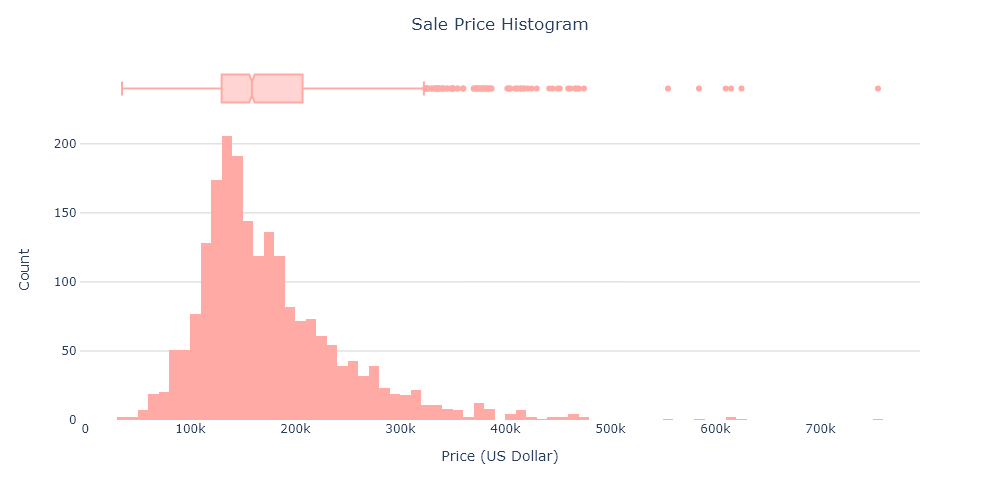

count    1707.000000
mean       68.212068
std        22.695616
min        21.000000
25%        57.000000
50%        67.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


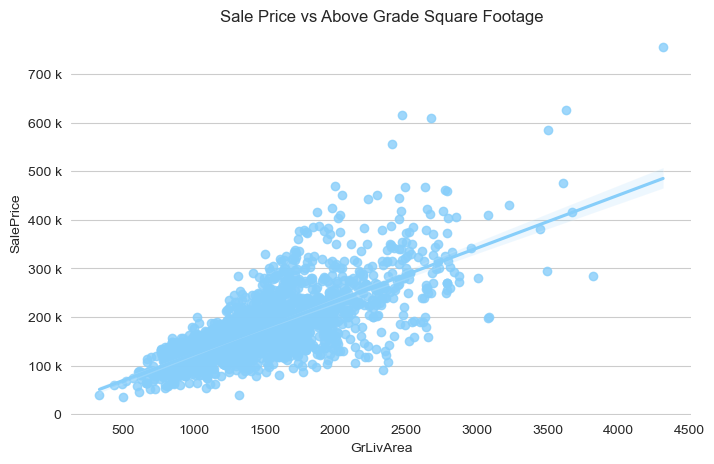

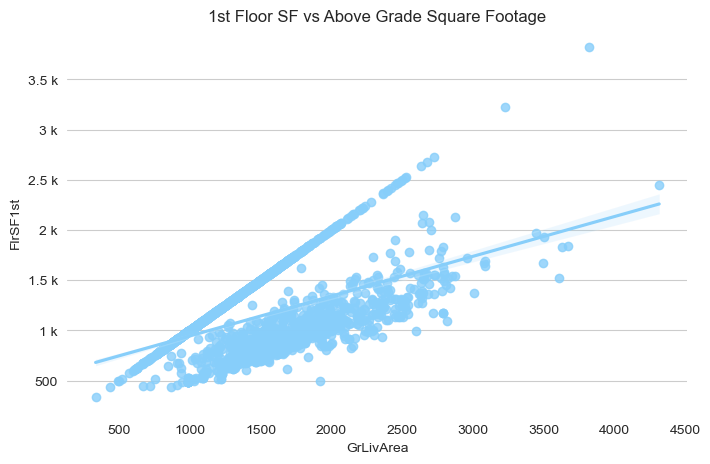

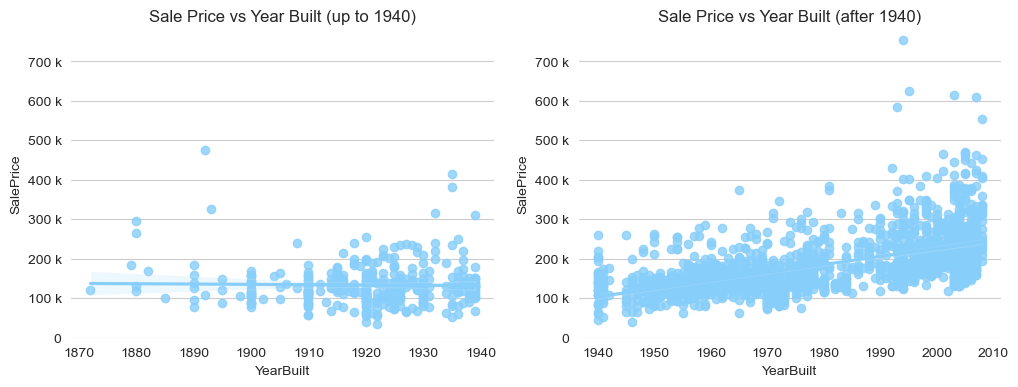

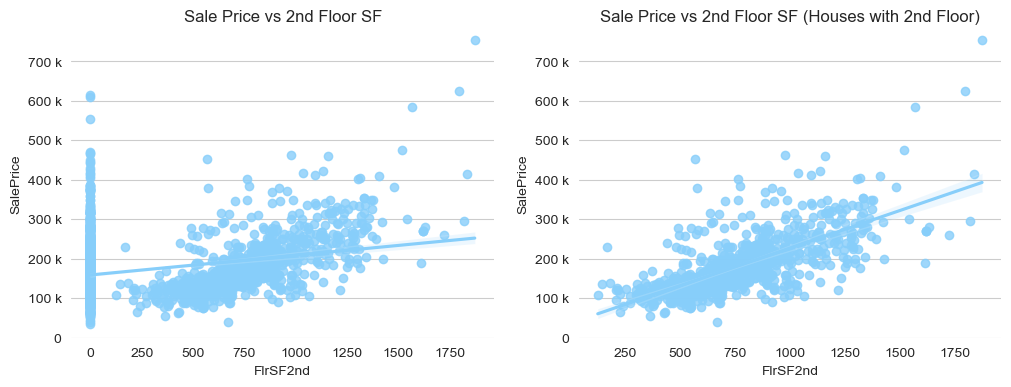

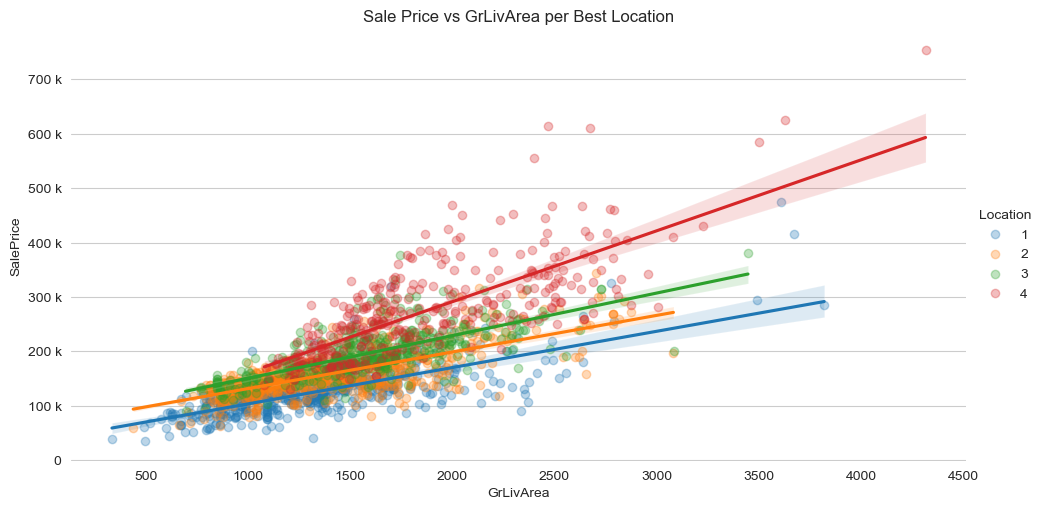

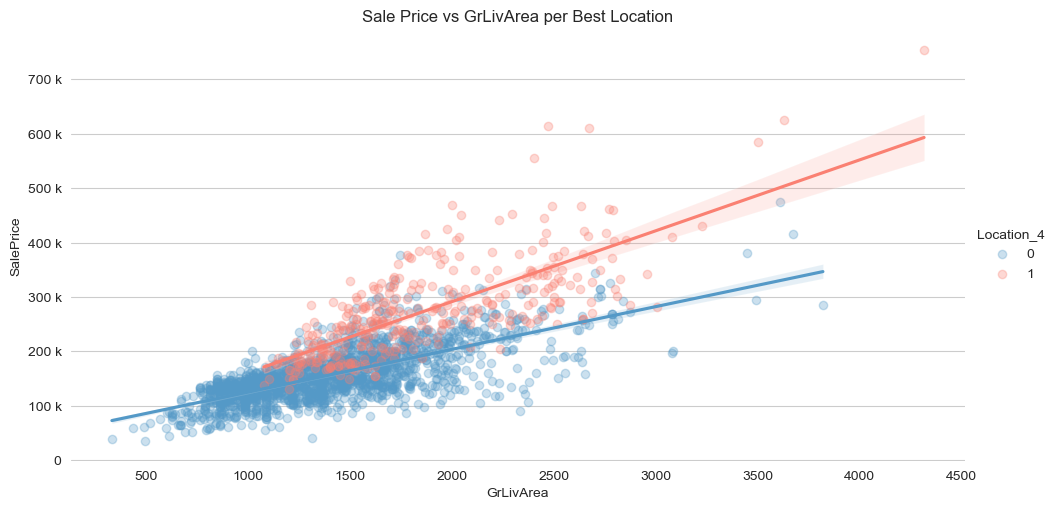

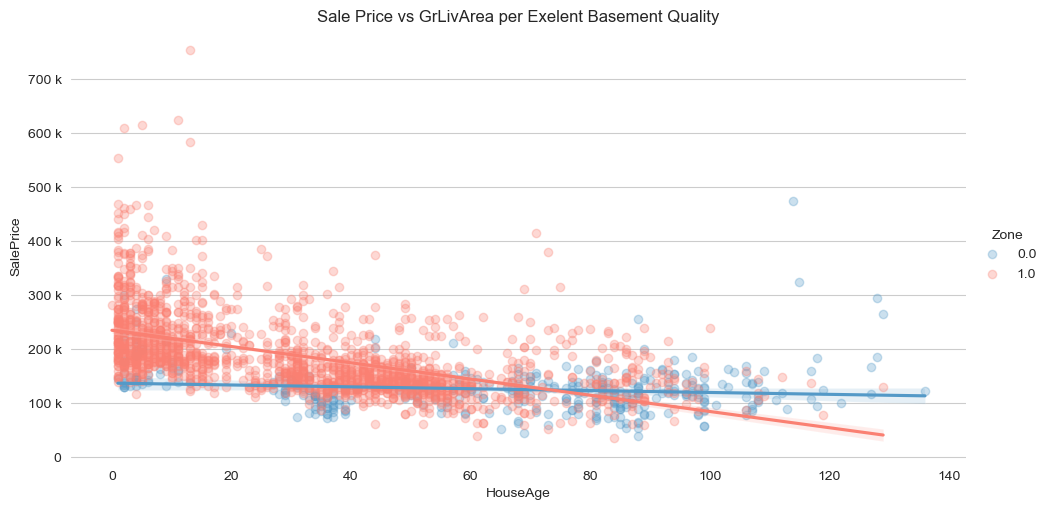

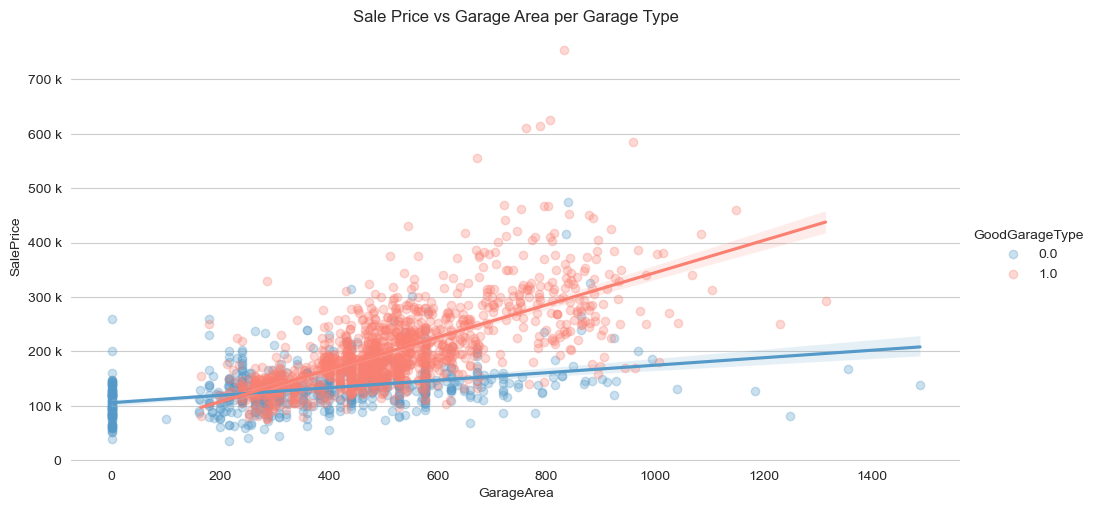

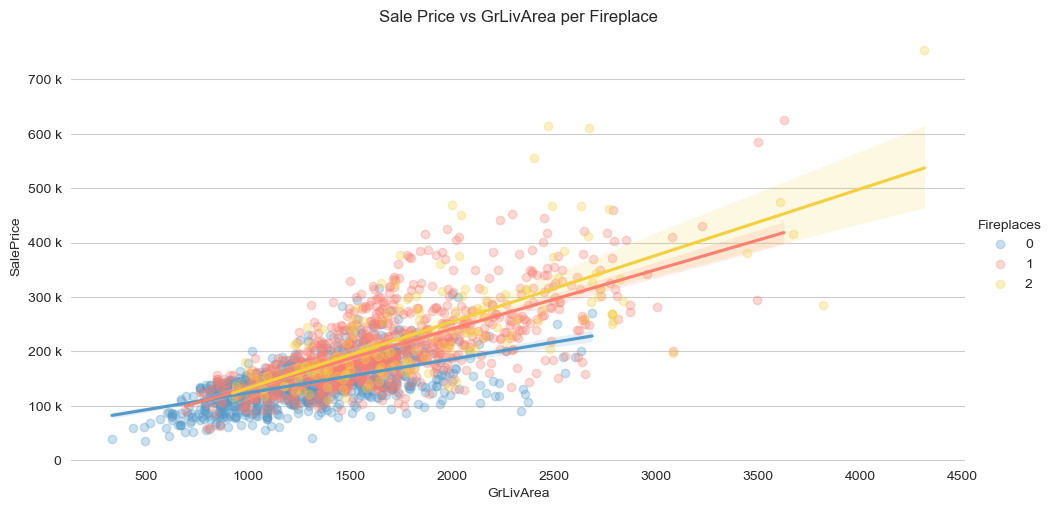

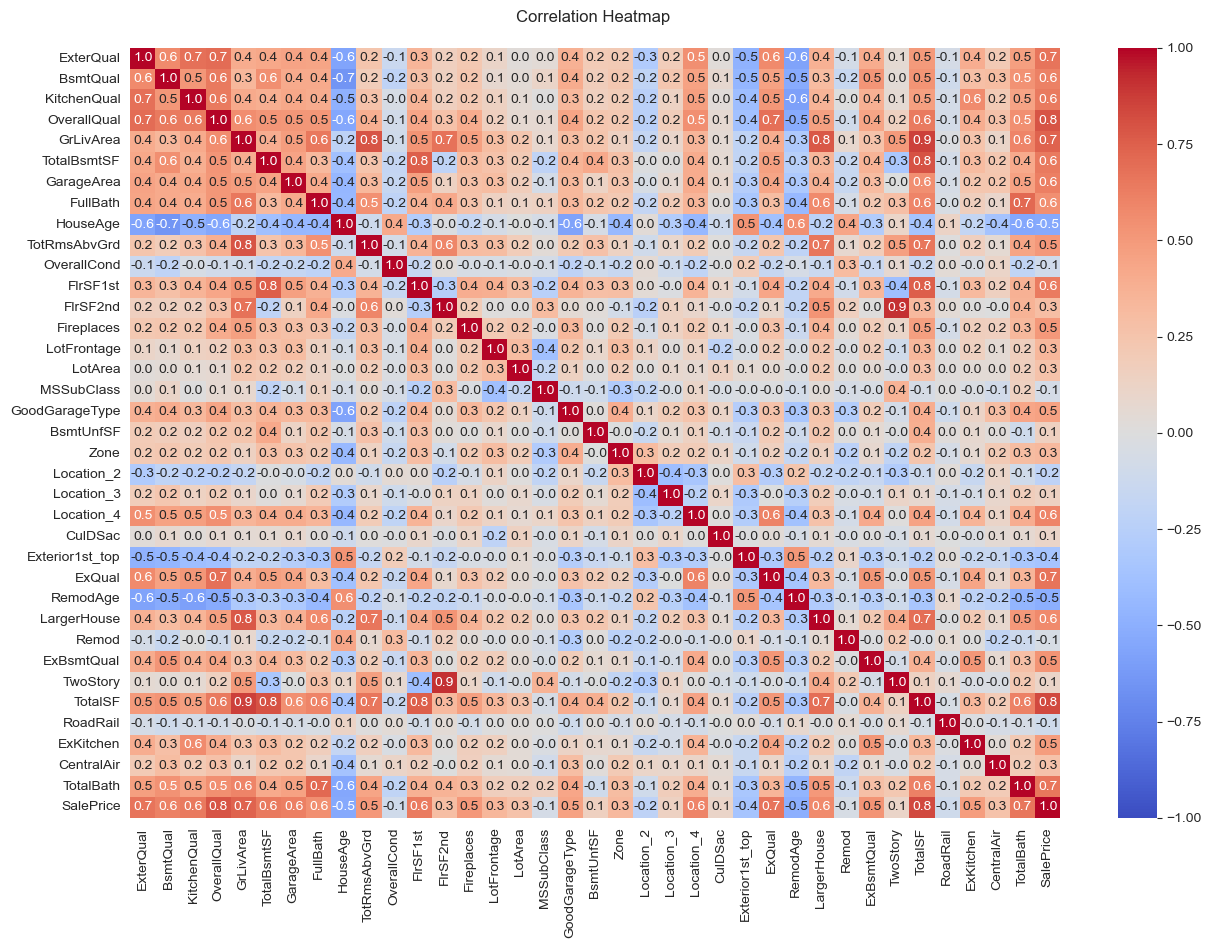

In [1]:
%run 1_Preprocessing.ipynb